# 图7. 最大TE数据。【学习这个图把1-100跳中典型的跳数选出来做展示】


图表已保存至: output\maxTE_bar_chart.png


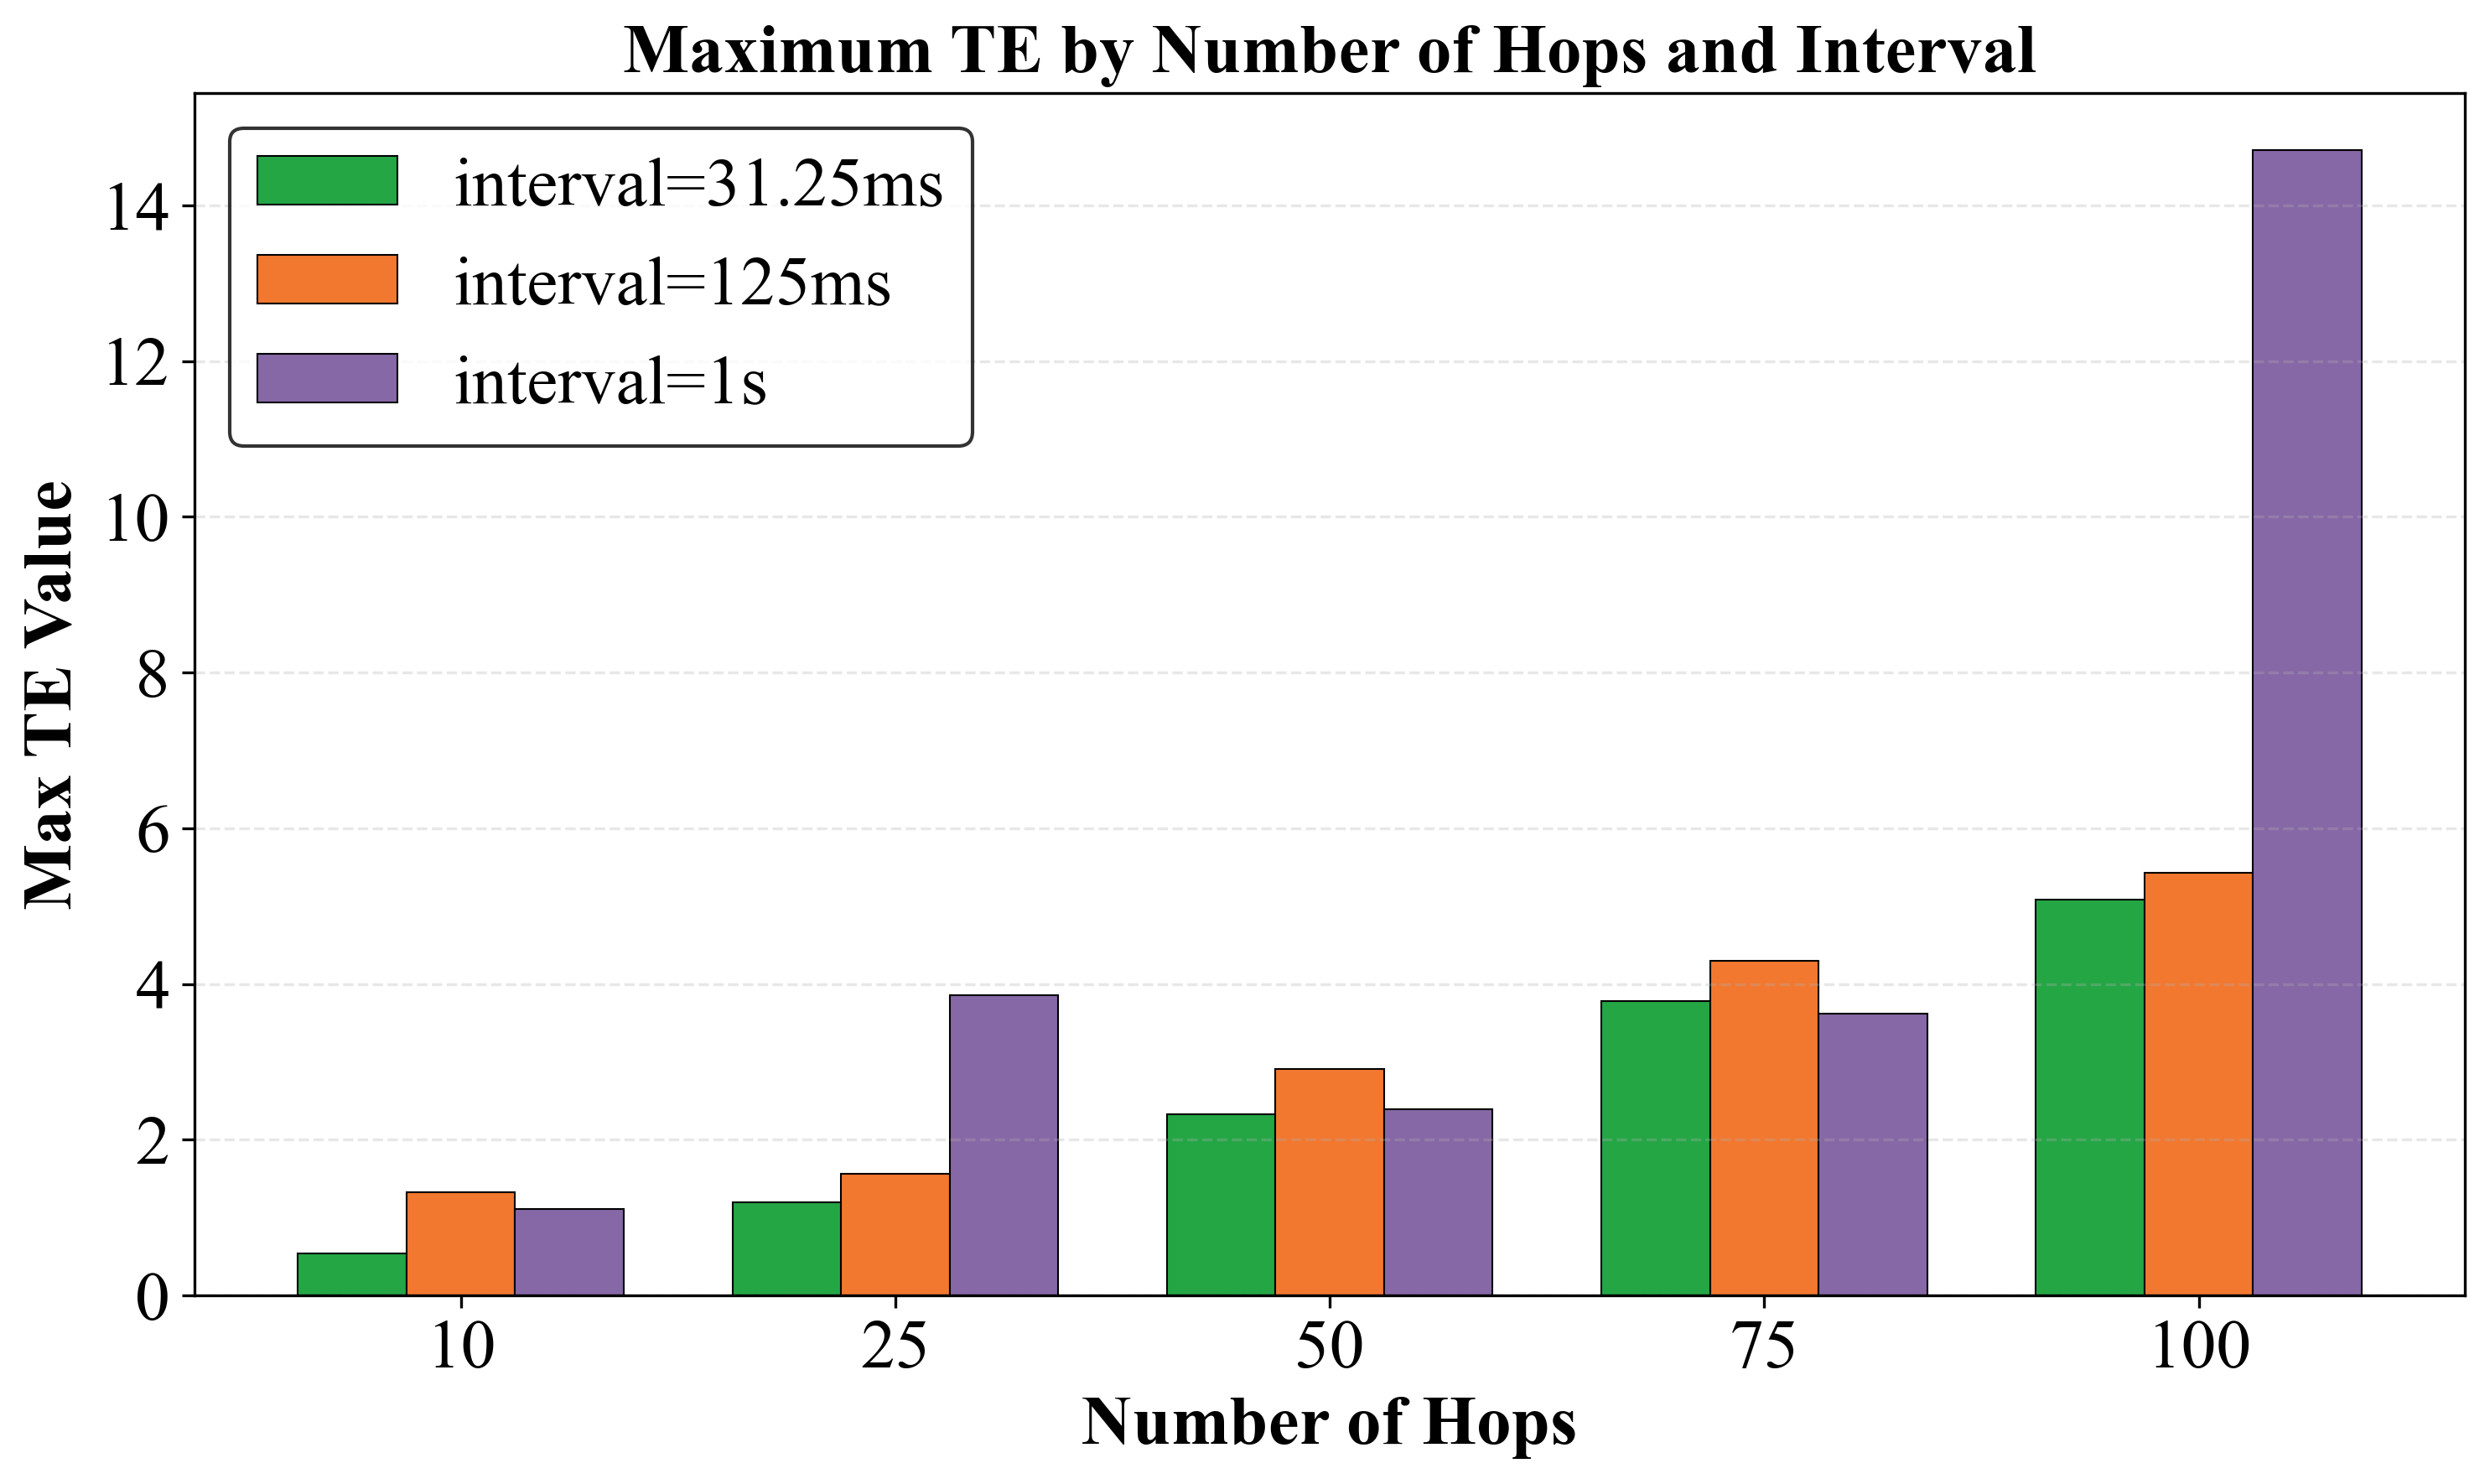

In [3]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/9 21:54
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   tiaoxingtu_20250409V1.py
**************************************
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置CSV文件路径（请修改为您的实际路径）
csv_path = r"/old_version/plot\data\maxTE.csv"  # 可以是相对路径或绝对路径

# 检查文件是否存在
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV文件未找到，请检查路径: {csv_path}")

# 从CSV文件读取数据
try:
    df = pd.read_csv(csv_path)
except Exception as e:
    raise ValueError(f"读取CSV文件失败: {str(e)}")

# 检查数据格式是否正确
required_columns = ['hops', 'interval=31.25ms', 'interval=125ms', 'interval=1s']
if not all(col in df.columns for col in required_columns):
    raise ValueError("CSV文件列名不符合要求，请确保包含: hops, interval=31.25ms, interval=125ms, interval=1s")

# 使用您提供的配色方案
colors = ['#24a645', '#f27830', '#8768a6']  # 选择前3种颜色对应3个interval

# 创建图表
plt.figure(figsize=(10, 6), dpi=300)

# 设置学术风格
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# 条形图参数
bar_width = 0.25
x = np.arange(len(df['hops']))

# 绘制条形图
for i, col in enumerate(df.columns[1:]):  # 跳过第一列'hops'
    plt.bar(x + i*bar_width, df[col], width=bar_width,
            color=colors[i], edgecolor='black', linewidth=0.5,
            label=col)

# 添加图表元素
plt.xlabel('Number of Hops', fontsize=20, fontweight='bold')
plt.ylabel('Max TE Value', fontsize=20, fontweight='bold')
plt.title('Maximum TE by Number of Hops and Interval', fontsize=20, fontweight='bold')
plt.xticks(x + bar_width, df['hops'], fontsize=20)
plt.yticks(fontsize=20)

# 添加图例和网格
plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局并显示
plt.tight_layout()

# 保存图表（取消注释以保存）
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)  # 创建输出目录
output_path = os.path.join(output_dir, "maxTE_bar_chart.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"图表已保存至: {output_path}")

plt.show()


# Fig8. 仿真的100跳时间感知网络在不同精度阈值内同步的概率